In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Read Input Data

In [2]:
df = pd.read_excel('result.xlsx')

In [3]:
df.sort_values('Time',inplace=True)

In [4]:
df.head()

,Avg Area,Avg Depth,Avg Width,Time,n_items
71,2.149,2.941,0.724,0.011,3
33,1.631,1.569,1.436,0.023,3
66,4.399,3.315,1.311,0.026,3
40,4.011,2.832,1.516,0.026,3
75,4.079,3.019,1.430,0.027,3


In [5]:
df2 = df[df['Time'] < 300]
#df2 = df.drop(columns=['Obj heur', 'Obj mod', 'Min Time', 'Max Time', 'Min Area', 'Max Area', 'Min D', 'Max D', 'Min W', 'Max W'])

In [6]:
df2.head()

,Avg Area,Avg Depth,Avg Width,Time,n_items
71,2.149,2.941,0.724,0.011,3
33,1.631,1.569,1.436,0.023,3
66,4.399,3.315,1.311,0.026,3
40,4.011,2.832,1.516,0.026,3
75,4.079,3.019,1.430,0.027,3


## Correlation

In [7]:
df2.corr()

,Avg Area,Avg Depth,Avg Width,Time,n_items
Avg Area,1.000000,0.713467,0.550130,-0.046617,0.058752
Avg Depth,0.713467,1.000000,-0.081805,-0.065036,0.004382
Avg Width,0.550130,-0.081805,1.000000,-0.009058,-0.017290
Time,-0.046617,-0.065036,-0.009058,1.000000,0.593212
n_items,0.058752,0.004382,-0.017290,0.593212,1.000000


Plot of correlation

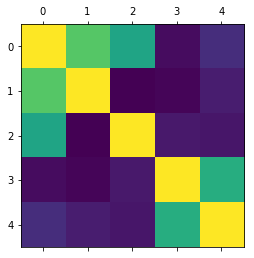

In [8]:
plt.matshow(df2.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa9a7147d0>,
      dtype=object)

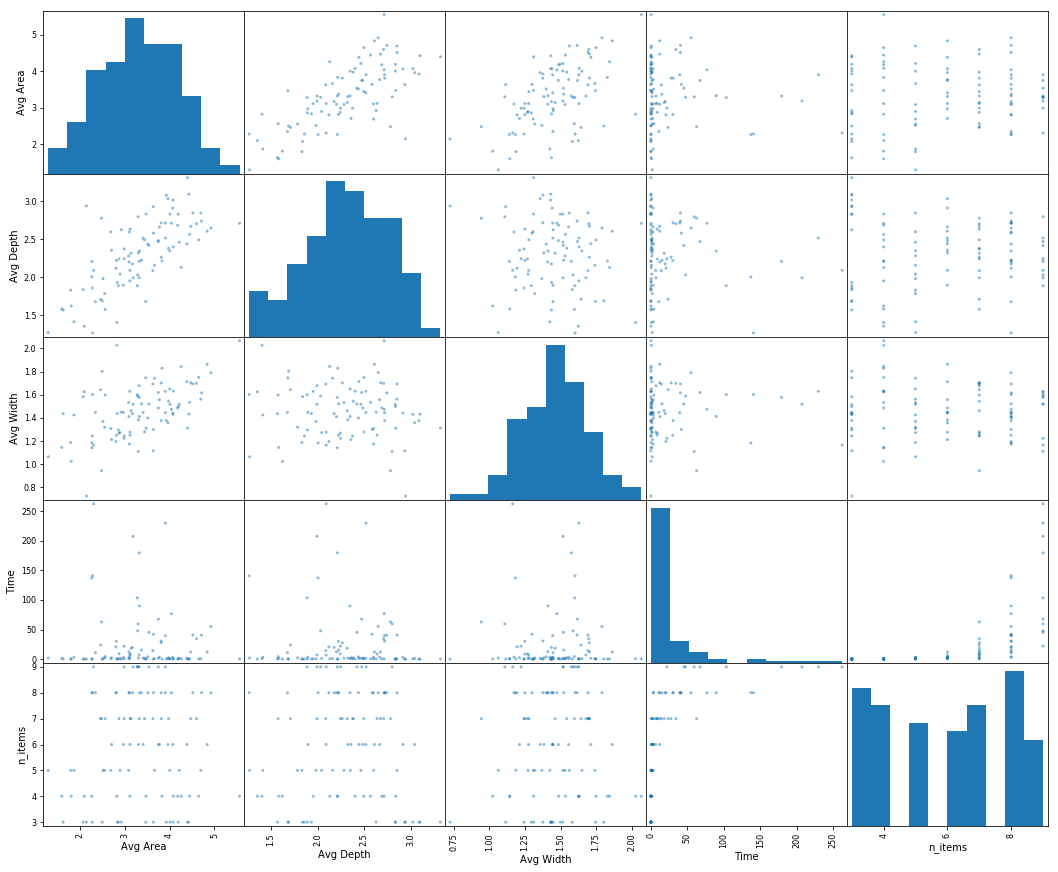

In [9]:
pd.plotting.scatter_matrix(df2, figsize=(18,15))

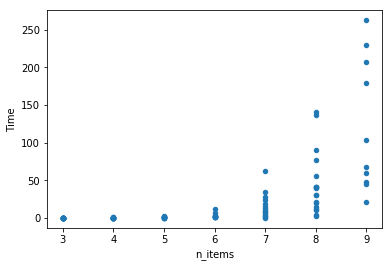

In [10]:
df2.plot.scatter('n_items', 'Time')

## Analyze data information

In [11]:
df2.reset_index(inplace=True,drop=True)

In [12]:
df3 = df2.drop(columns=['Time'])

## Rescale data

In [13]:
scaler = StandardScaler()

In [14]:
df3 = pd.DataFrame(data = scaler.fit_transform(df3))

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Rescaled data

In [15]:
df3.head()

,0,1,2,3
0,-1.386655,1.403152,-3.193510,-1.444041
1,-1.992993,-1.615480,-0.096518,-1.444041
2,1.247053,2.226015,-0.640231,-1.444041
3,0.792885,1.163334,0.251459,-1.444041
4,0.872481,1.574765,-0.122616,-1.444041


## PCA

In [16]:
pca = PCA()

In [17]:
principalDf = pd.DataFrame(data = pca.fit_transform(df3), columns = ['pc1','pc2','pc3','pc4'])

In [18]:
cumul_expl_var_ratio = pca.explained_variance_ratio_.cumsum()

In [19]:
cumul_expl_var_ratio

array([0.46604139, 0.73649899, 0.98595531, 1.        ])

In [20]:
pca.explained_variance_ratio_

array([0.46604139, 0.27045761, 0.24945632, 0.01404469])

Data in the new system

In [21]:
principalDf.head()

,pc1,pc2,pc3,pc4
0,1.578584,-3.112297,1.985871,0.231086
1,2.443561,1.089698,1.179352,0.356455
2,-1.819807,-1.524951,1.835070,0.027919
3,-1.260797,-0.207695,1.573427,0.148586
4,-1.395999,-0.742679,1.678357,0.155336


New orthogonal system vectors

In [22]:
pca.components_

array([[-0.72227887, -0.5581036 , -0.40609635, -0.04381046],
       [ 0.02376867, -0.58927909,  0.78708334, -0.18078998],
       [-0.00643742,  0.16134389, -0.10441894, -0.98133755],
       [-0.6911634 ,  0.56146119,  0.45241823,  0.04870557]])

In [23]:
df_compressed = principalDf.drop(columns=['pc4'])
df_compressed = pd.concat([df_compressed, df2['Avg Time']],axis=1)

KeyError: 'Avg Time'

In [ ]:
df_compressed.head()

In [ ]:
df_compressed.corr()

In [ ]:
pd.plotting.scatter_matrix(df_compressed, figsize=(18,15))

## Linear Regression

In [ ]:
regressor = LinearRegression()

In [ ]:
X = df_compressed.copy()
y = X.pop('Avg Time')

In [ ]:
regressor.fit(X,y)